# 1. Introdução

### Otimização de Estratégias de Venda Online

Contexto<br>
O dataset fornecido contém informações detalhadas sobre os pedidos, incluindo dados sobre clientes, produtos, vendas, lucros, custos de envio e prazos de entrega. Essas informações abrangem vários anos e regiões, permitindo uma análise do desempenho da empresa.
    
Objetivo<br>
O objetivo principal desta análise é fornecer insights estratégicos e operacionais que possam ajudar a empresa otimizar suas operações, aumentar a satisfação do cliente e melhorar sua lucratividade. Especificamente, a análise visa:<br>
-Melhorar a Eficiência Logística<br>
-Aumentar a Rentabilidade dos Produtos<br>
-Aprimorar as Estratégias de Vendas e Marketing<br>
    

# 2. Carregando bibliotecas

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# 3. Analisando estrutura do dataset

In [3]:
df = pd.read_csv('C:/DataSets/SuperStoreOrders.csv')

In [4]:
df.shape

(51290, 21)

In [5]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [7]:
df['year'] = df['year'].astype(str)

In [8]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [9]:
#Convertendo string para datetime
df['order_date'] = df['order_date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y') if '/' in x else pd.to_datetime(x, format='%d-%m-%Y'))
df['ship_date'] = df['ship_date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y') if '/' in x else pd.to_datetime(x, format='%d-%m-%Y'))

# 4. Breve resumo estatístico do dataframe

In [10]:
df.describe()

,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915
std,2.278766,0.212280,174.424113,57.296804
min,1.000000,0.000000,-6599.978000,0.000000
25%,2.000000,0.000000,0.000000,2.610000
50%,3.000000,0.000000,9.240000,7.790000
75%,5.000000,0.200000,36.810000,24.450000
max,14.000000,0.850000,8399.976000,933.570000


# 5. Análise de Eficiência Logística e Entrega

In [11]:
df['tempo_entrega'] = (df['ship_date'] - df['order_date']).astype(str)

In [12]:
df['tempo_entrega'] = df['tempo_entrega'].apply(lambda x: x[0])

In [13]:
df['tempo_entrega'] = df['tempo_entrega'].astype(int)

In [14]:
df['tempo_entrega'].describe()

count    51290.000000
mean         3.969370
std          1.729437
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: tempo_entrega, dtype: float64

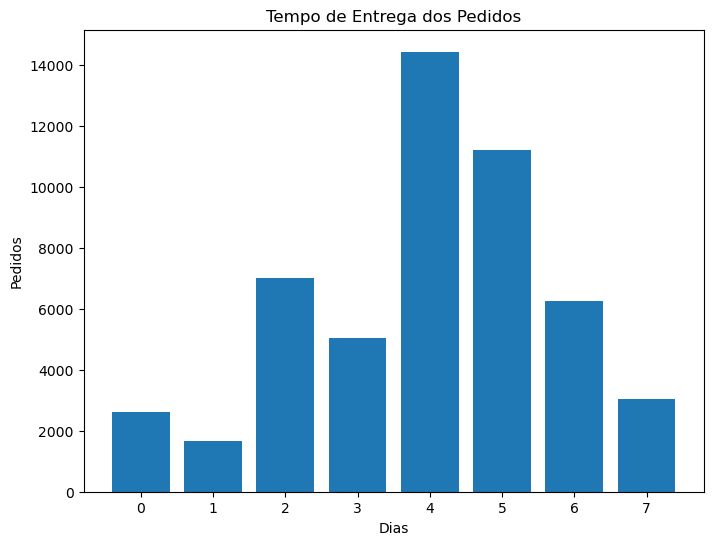

In [15]:
plt.figure(figsize = (8, 6))
plt.bar(df['tempo_entrega'].value_counts().index, df['tempo_entrega'].value_counts())
plt.title('Tempo de Entrega dos Pedidos')
plt.xlabel('Dias')
plt.ylabel('Pedidos')
plt.show()

In [16]:
tempo_entrega_mode = df.groupby('ship_mode')['tempo_entrega'].mean().sort_values(ascending = False)

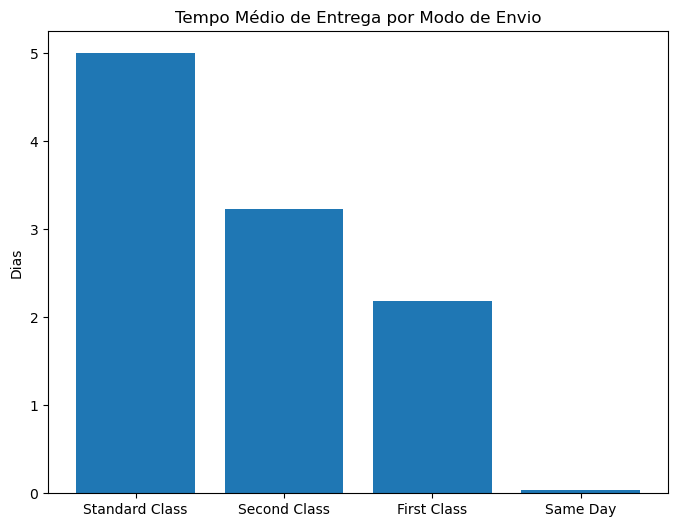

In [17]:
plt.figure(figsize = (8, 6))
plt.bar(tempo_entrega_mode.index, tempo_entrega_mode.value_counts().index)
plt.title('Tempo Médio de Entrega por Modo de Envio')
plt.ylabel('Dias')
plt.show()

In [18]:
tempo_entrega_regiao = df.groupby('region')['tempo_entrega'].mean().sort_values(ascending = True)

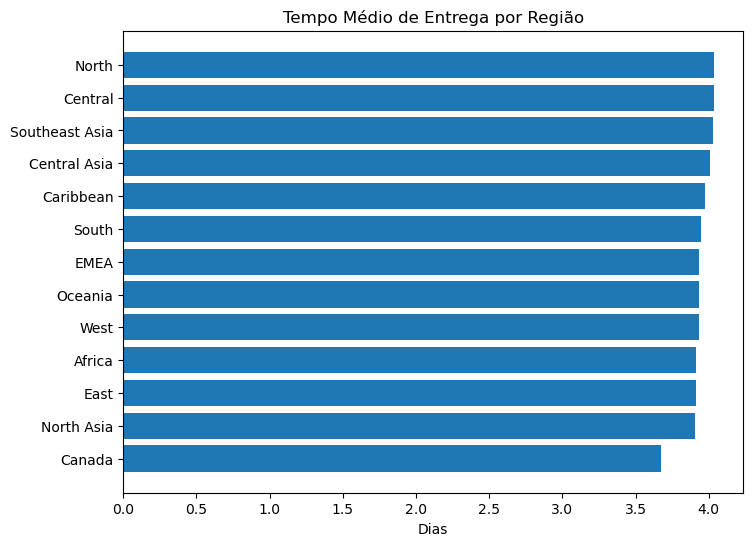

In [19]:
plt.figure(figsize = (8, 6))
plt.barh(tempo_entrega_regiao.index, tempo_entrega_regiao)
plt.title('Tempo Médio de Entrega por Região')
plt.xlabel('Dias')
plt.show()

In [20]:
tempo_entrega_year = df.groupby('year')['tempo_entrega'].mean()

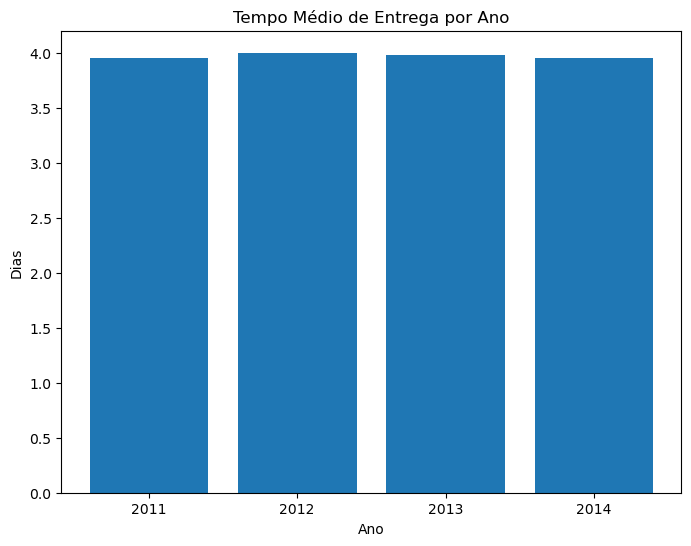

In [21]:
plt.figure(figsize = (8, 6))
plt.bar(tempo_entrega_year.index, tempo_entrega_year)
plt.title('Tempo Médio de Entrega por Ano')
plt.xlabel('Ano')
plt.ylabel('Dias')
plt.show()

### Podemos observar que no decorrer dos anos a média do tempo de entrega dos produtos não variou muito tendo uma média de aproximadamente 4 dias, também notou-se uma estabilidade no tempo médio de entrega por região o que indica que não há problemas logísticos. No tempo de entrega por modo de envio o modo 'Standard Class' demora aproximadamente 5 dias enquanto os outros demoram em torno de 3 dias seria interessante aplicar promções nestes 3 modos de entrega para aumentar a satisfação do cliente.

# 6. Análise de Rentabilidade dos Produtos

In [22]:
df['profit'].describe()

count    51290.000000
mean        28.641740
std        174.424113
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: profit, dtype: float64

In [23]:
product_lucro = df.groupby('product_name')['profit'].sum().sort_values(ascending = False)

In [24]:
product_lucro = [product_lucro.index[0:10], product_lucro[0:10]]

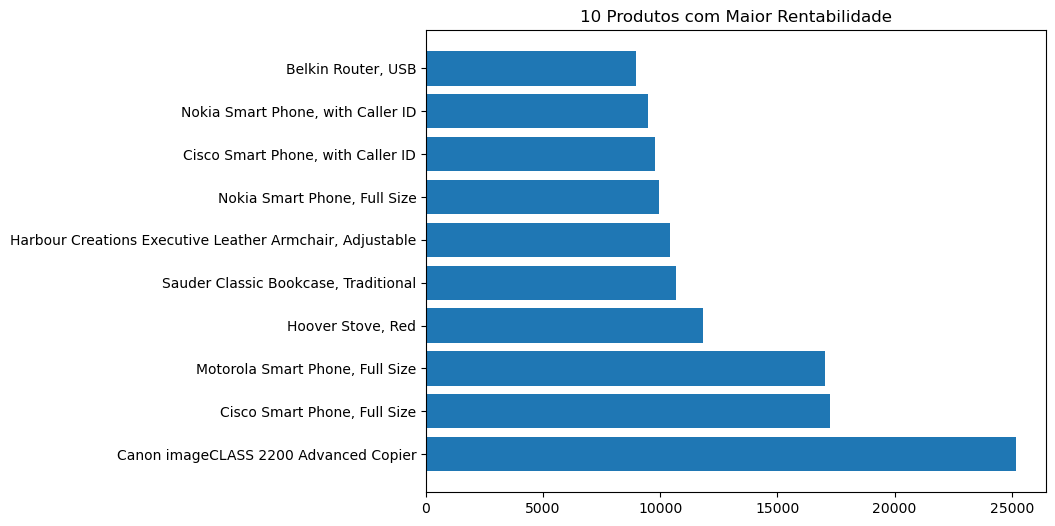

In [25]:
plt.figure(figsize = (8, 6))
plt.barh(product_lucro[0], product_lucro[1])
plt.title('10 Produtos com Maior Rentabilidade')
plt.show()

In [26]:
category_lucro = df.groupby('category')['profit'].sum()

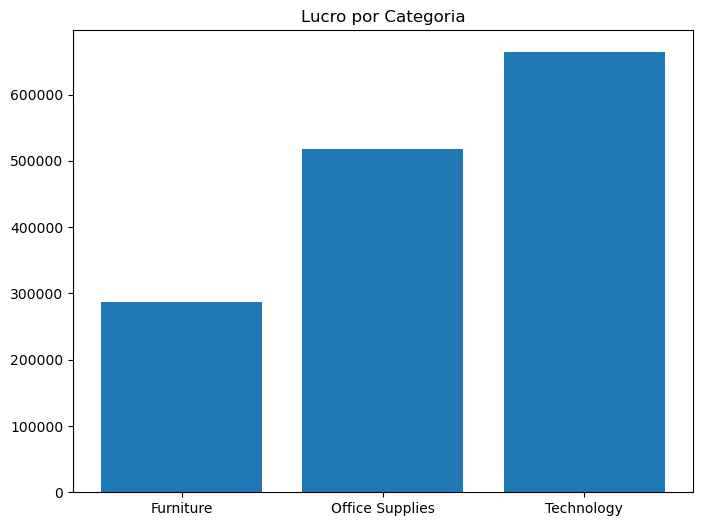

In [27]:
plt.figure(figsize = (8, 6))
plt.bar(category_lucro.index, category_lucro)
plt.title('Lucro por Categoria')
plt.show()

In [28]:
sub_profit = df.groupby('sub_category')['profit'].sum().sort_values(ascending = True)

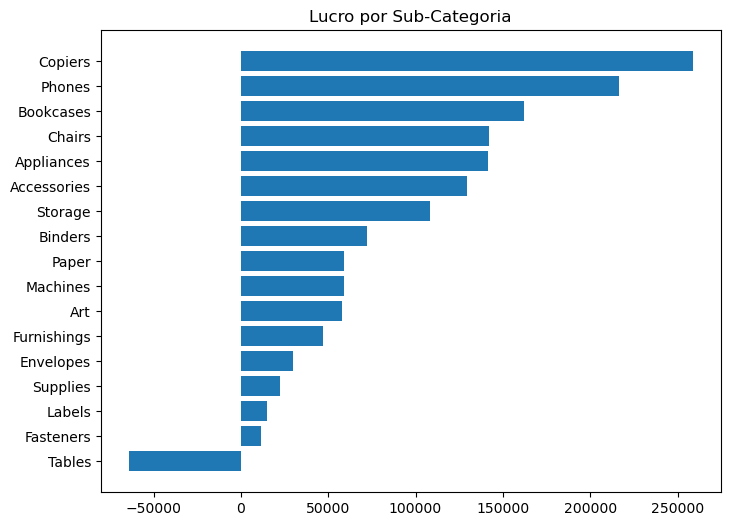

In [29]:
plt.figure(figsize = (8, 6))
plt.barh(sub_profit.index, sub_profit)
plt.title('Lucro por Sub-Categoria')
plt.show()

In [30]:
profit_discount = df.groupby('discount')['profit'].sum()

In [31]:
produtos_negativo = df['profit'].apply(lambda x: x if x < 0 else 0).sum()

In [32]:
produtos_negativo

-920357.39072

In [33]:
produtos_positivo = df['profit'].apply(lambda x: x if x > 0 else 0).sum()

In [34]:
produtos_positivo

2389392.2120000003

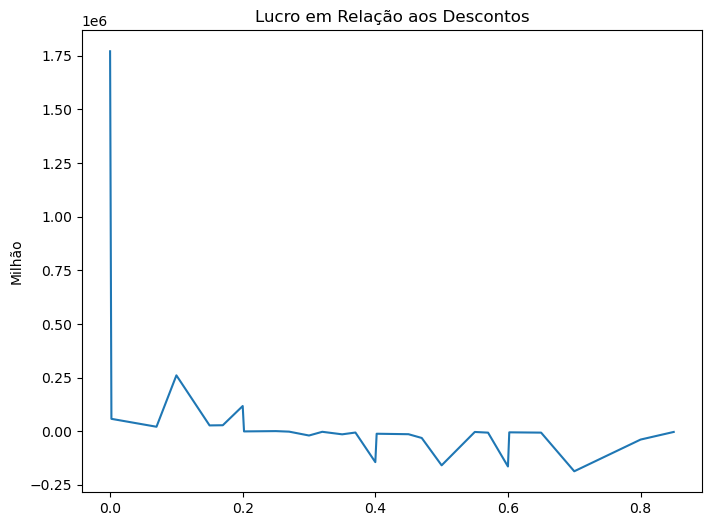

In [60]:
plt.figure(figsize = (8, 6))
plt.plot(profit_discount.index, profit_discount)
plt.title('Lucro em Relação aos Descontos')
plt.ylabel('Milhão')
plt.show()

In [36]:
profit_year = df.groupby('year')['profit'].sum()

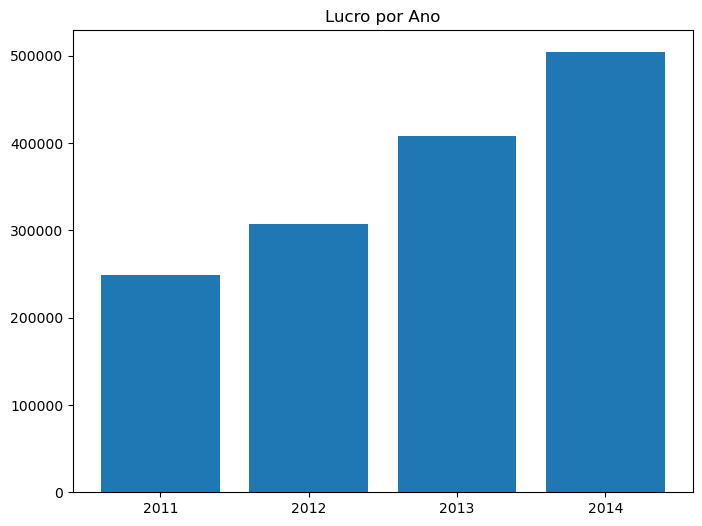

In [37]:
plt.figure(figsize = (8, 6))
plt.bar(profit_year.index, profit_year)
plt.title('Lucro por Ano')
plt.show()

### A categoria de produtos com maior rentabilidade da empresa é Technology, a sub-categoria Tables é a única que não da lucro é interessante rever seus preços e descontos. Temos algumas vendas que estão dando prejuízo a empresa somando 920357 de saldo negativo, cerca de 25% das vendas estão com saldo negativo, produtos com mais de 20% de descontro tendem a dar prejuízo. A empresa cresceu muito de  2011 para 2014 que quase dobrou seu lucro

# 7. Análise de Estratégias de Vendas e Marketing

In [54]:
df['sales'] = df['sales'].str.replace(',', '').astype(int)

In [65]:
segment_sales = df.groupby('segment')['sales'].sum()

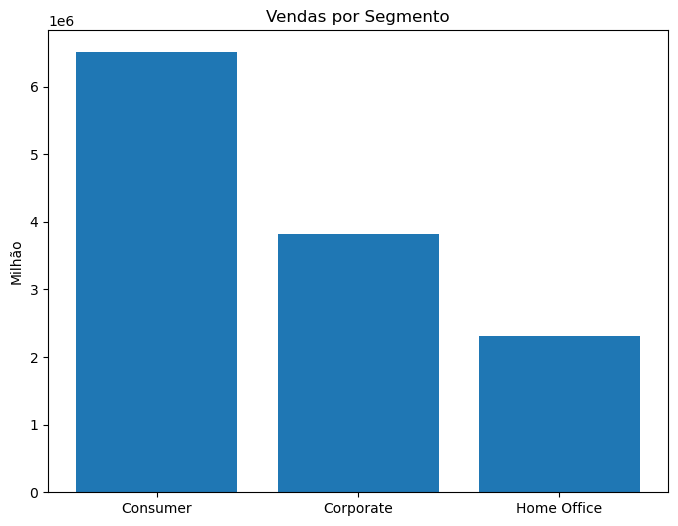

In [67]:
plt.figure(figsize = (8, 6))
plt.bar(segment_sales.index, segment_sales)
plt.title('Vendas por Segmento')
plt.ylabel('Milhão')
plt.show()

In [74]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending = True)

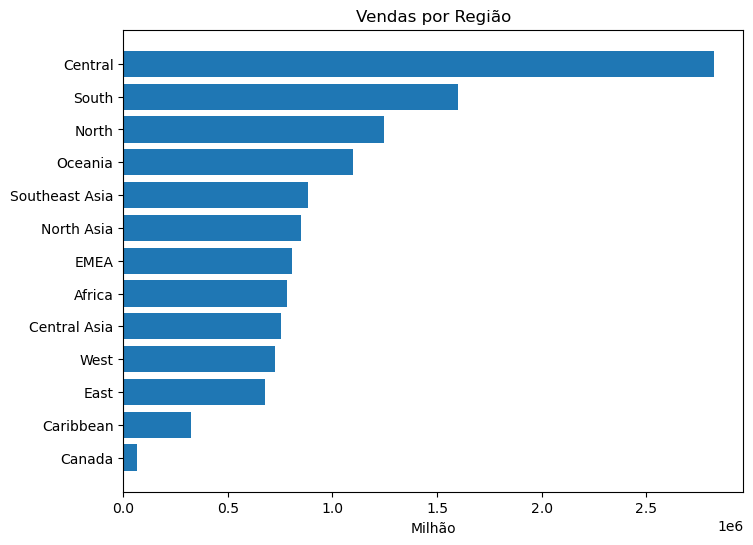

In [76]:
plt.figure(figsize = (8, 6))
plt.barh(region_sales.index, region_sales)
plt.title('Vendas por Região')
plt.xlabel('Milhão')
plt.show()

In [80]:
market_sales = df.groupby('market')['sales'].sum().sort_values(ascending = True)

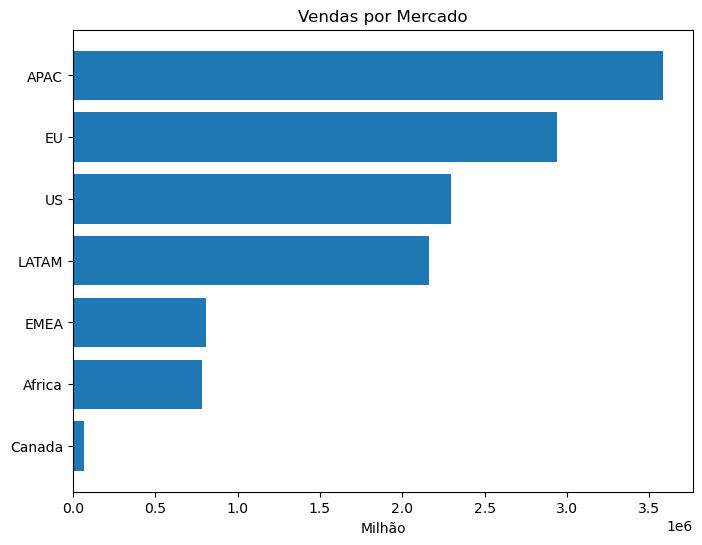

In [81]:
plt.figure(figsize = (8, 6))
plt.barh(market_sales.index, market_sales)
plt.title('Vendas por Mercado')
plt.xlabel('Milhão')
plt.show()

In [82]:
line_sales = df.groupby(['year', 'order_date'])['sales'].sum()

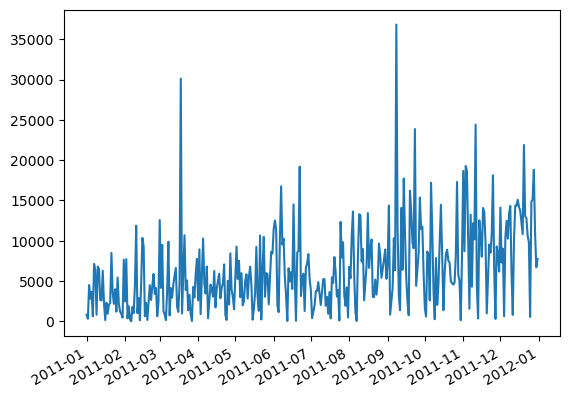

In [98]:
plt.plot(line_sales['2011'].index, line_sales['2011'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title('Linha Temporal de Vendas do ano 2011')
plt.show()

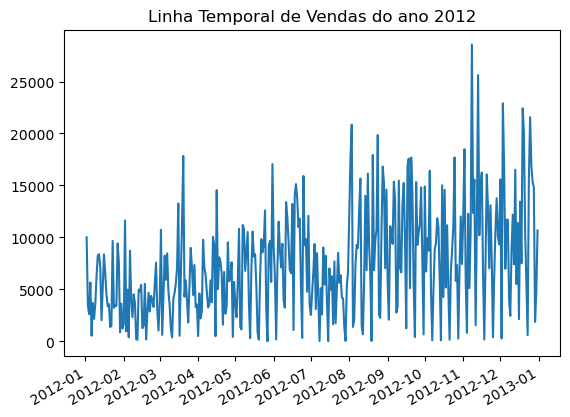

In [121]:
plt.plot(line_sales['2012'].index, line_sales['2012'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title('Linha Temporal de Vendas do ano 2012')
plt.show()

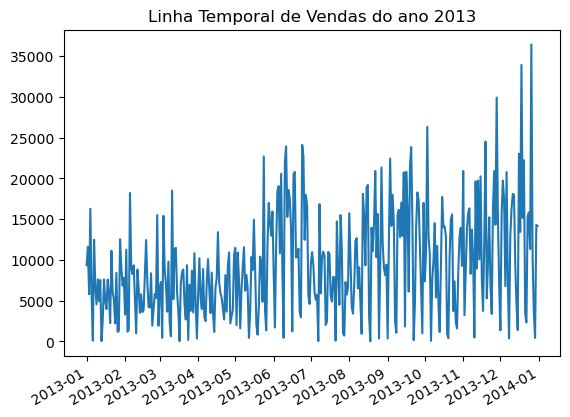

In [122]:
plt.plot(line_sales['2013'].index, line_sales['2013'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title('Linha Temporal de Vendas do ano 2013')
plt.show()

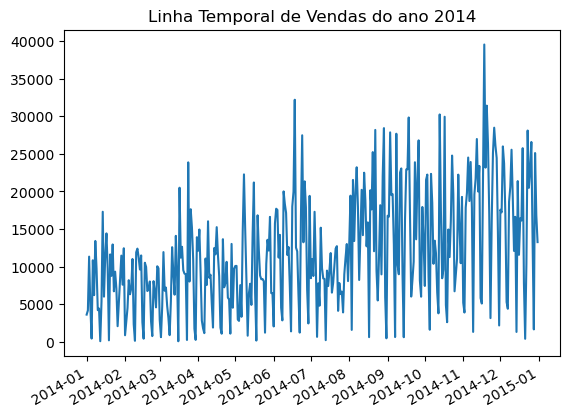

In [123]:
plt.plot(line_sales['2014'].index, line_sales['2014'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title('Linha Temporal de Vendas do ano 2014')
plt.show()

In [110]:
year_sales = df.groupby(['segment', 'year'])['sales'].sum()

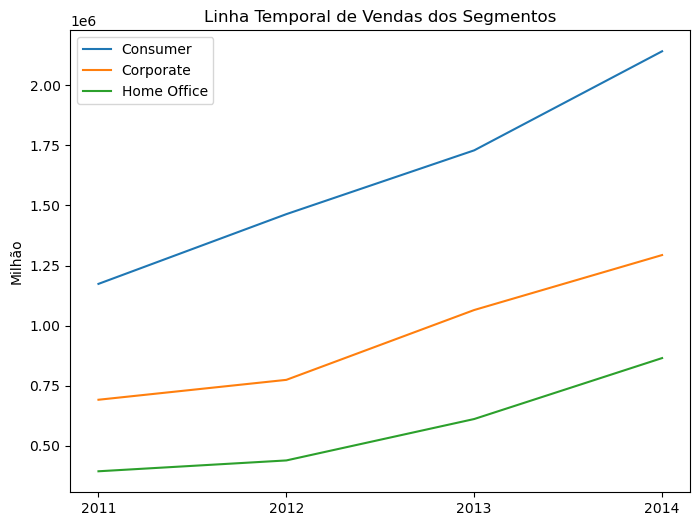

In [124]:
plt.figure(figsize = (8, 6))
plt.plot(year_sales['Consumer'], label = 'Consumer')
plt.plot(year_sales['Corporate'], label = 'Corporate')
plt.plot(year_sales['Home Office'], label = 'Home Office')
plt.legend()
plt.title('Linha Temporal de Vendas dos Segmentos')
plt.ylabel('Milhão')
plt.show()

### Através destes gráficos podemos ver quantas vendas cada segmento fez no total e em cada ano assim podemos perceber que cada segmento está aumentando muito seu numero de vendas a cada ano,  também podemos notar qual mercado está com maior número de vendas. Temos uma linha temporal do fluxo de vendas de cada ano e é notável que em todo final de ano o fluxo aumenta consideravelmente. Através destes insights podemos melhorar o marketing da empresa.